In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('ecommerce_orders.csv')
df.head()
df

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95
...,...,...,...,...,...,...,...,...
95,1096,12,2024-04-05,Books,116.82,10,Credit Card,105.14
96,1097,2,2024-04-06,Home & Kitchen,132.49,5,Net Banking,125.87
97,1098,1,2024-04-07,Home & Kitchen,131.61,0,Credit Card,131.61
98,1099,16,2024-04-08,Clothing,58.67,20,Credit Card,46.94


In [19]:
df.dtypes

OrderID              int64
CustomerID           int64
OrderDate           object
Category            object
OrderValue         float64
DiscountApplied      int64
PaymentMethod       object
Revenue            float64
dtype: object

In [13]:
df.isnull().sum() 

OrderID            0
CustomerID         0
OrderDate          0
Category           0
OrderValue         0
DiscountApplied    0
PaymentMethod      0
Revenue            0
dtype: int64

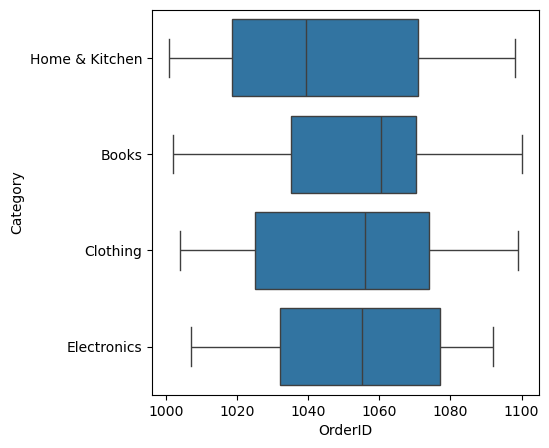

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x='OrderID',y='Category',data=df)
plt.show()

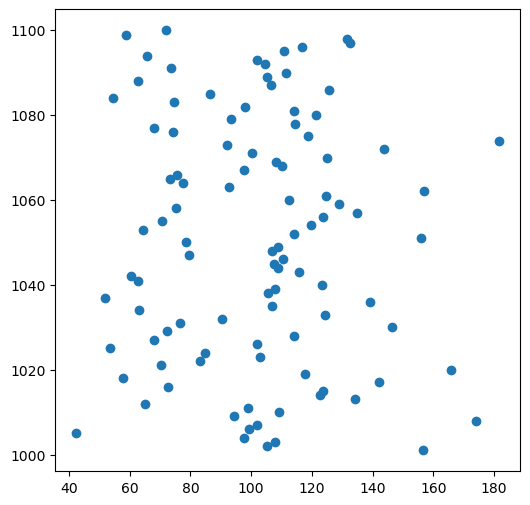

In [23]:
 plt.figure(figsize=(6,6))
 plt.scatter(df['OrderValue'], df['OrderID'])
 plt.show()

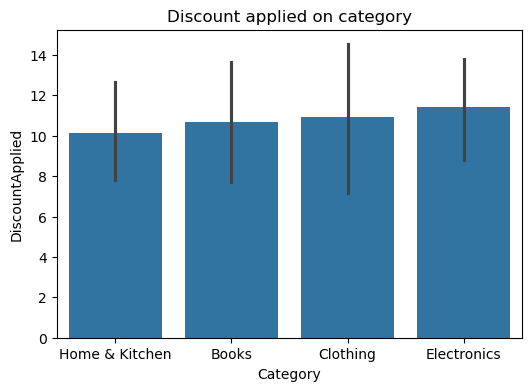

In [27]:
plt.figure(figsize=(6,4)) 
sns.barplot(x ='Category',y='DiscountApplied', data = df)
plt.title('Discount applied on category')  
plt.xlabel('Category')  
plt.ylabel('DiscountApplied')  
plt.show()  

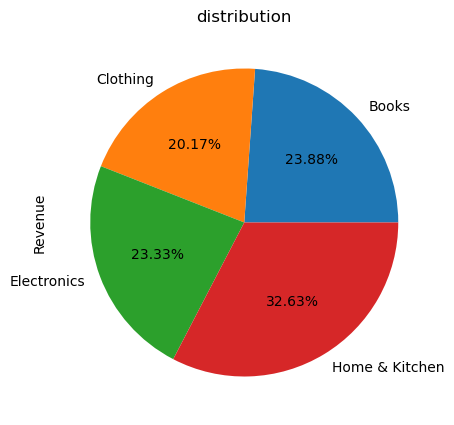

In [29]:
a= df.groupby('Category')['Revenue'].sum()
a.plot(kind='pie',autopct='%1.2f%%',title='distribution', figsize=(10,5))
plt.show()

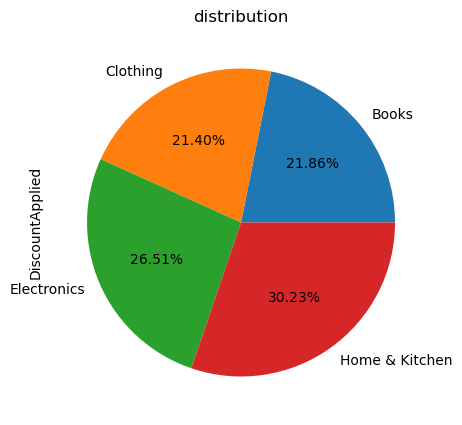

In [31]:
a= df.groupby('Category')['DiscountApplied'].sum()
a.plot(kind='pie',autopct='%1.2f%%',title='distribution', figsize=(10,5))
plt.show()

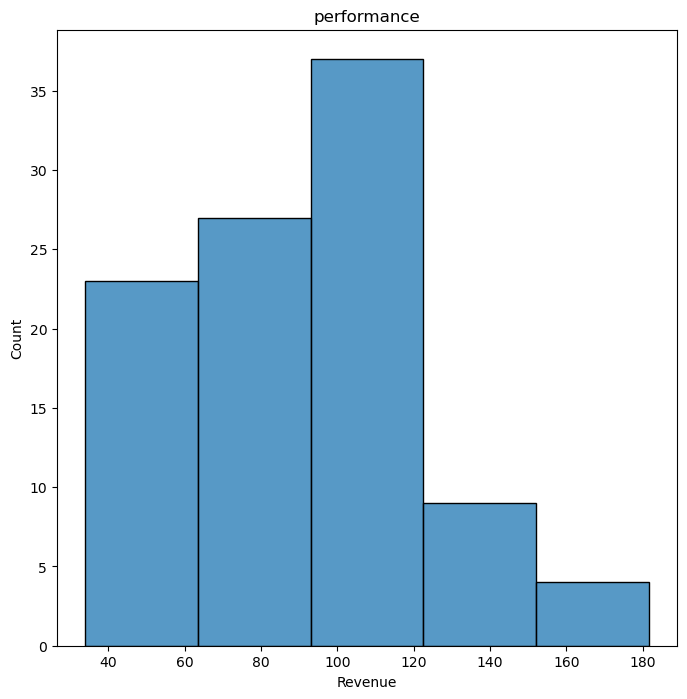

In [33]:
 plt.figure(figsize=(8,8))
 sns.histplot(df['Revenue'], bins=5)
 plt.title('performance')
 plt.show()

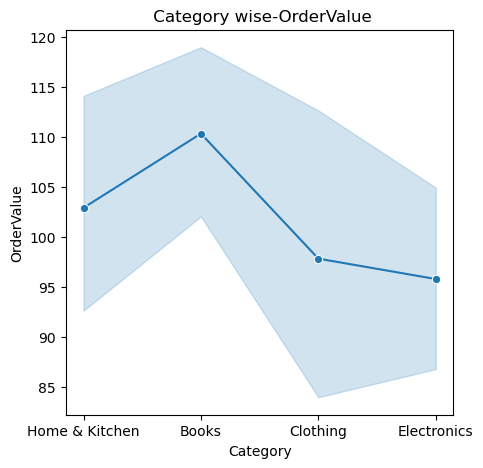

In [35]:
 plt.figure(figsize=(5,5))
 sns.lineplot(x='Category', y='OrderValue', data=df, marker='o')
 plt.title(' Category wise-OrderValue')
 plt.show()

In [49]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month and year
df['Year-Month'] = df['OrderDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = df.groupby('Year-Month')['Revenue'].sum()

print(monthly_revenue)

Year-Month
2024-01    2894.01
2024-02    2634.81
2024-03    2798.34
2024-04     820.54
Freq: M, Name: Revenue, dtype: float64


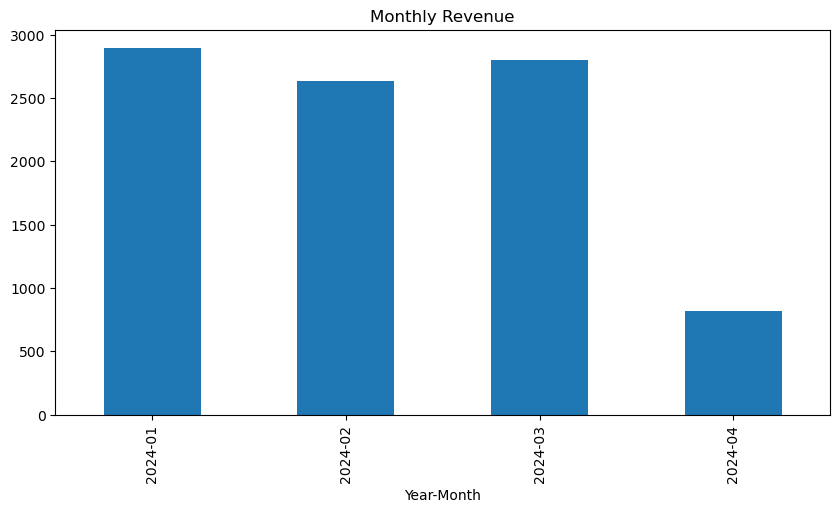

In [51]:
monthly_revenue.plot(kind='bar', title='Monthly Revenue', figsize=(10,5))

plt.show()


In [ ]:
plt.figure(figsize=(6,4)) 
sns.barplot(x ='Category',y='DiscountApplied', data = df)
plt.title('Discount applied on category')  
plt.xlabel('Category')  
plt.ylabel('DiscountApplied')  
plt.show() 

In [57]:
category_revenue = df.groupby('Category')['Revenue'].sum()

# Identify the top-selling category
top_category = category_revenue.idxmax()

print(f'Top selling category by revenue: {top_category} with {category_revenue.max()} revenue')


Top selling category by revenue: Home & Kitchen with 2984.75 revenue


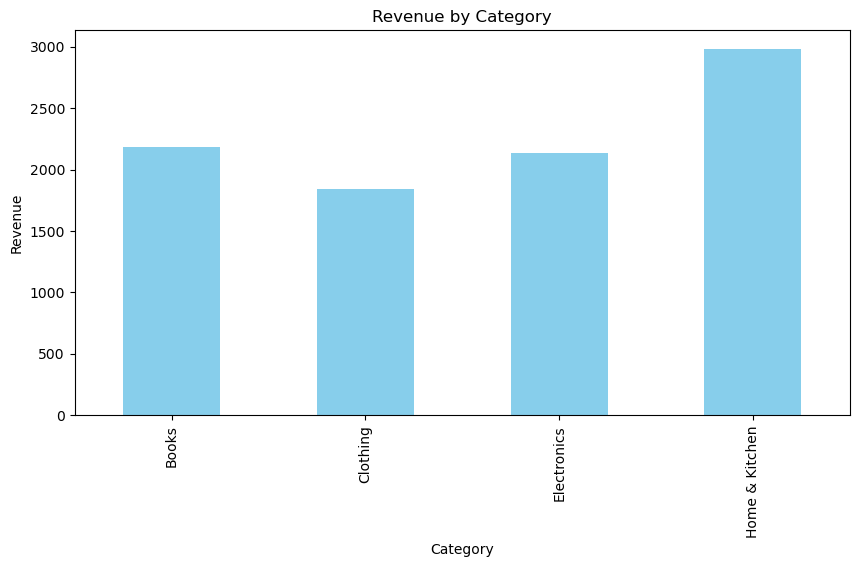

In [63]:
category_revenue.plot(kind='bar', title='Revenue by Category', figsize=(10,5), color='skyblue')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.show()

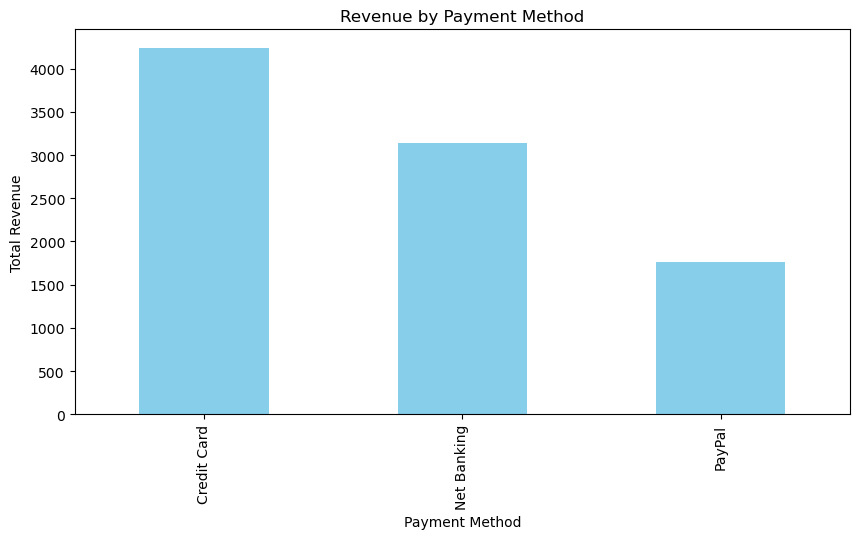

In [65]:
payment_summary = df.groupby('PaymentMethod')['Revenue'].agg(['sum', 'count'])
payment_summary['sum'].plot(kind='bar', title='Revenue by Payment Method', color='skyblue', figsize=(10,5))
plt.ylabel('Total Revenue')
plt.xlabel('Payment Method')
plt.show()

 Popular payment method : Credit Card
 Top performing category : Home & kitchen
Business recommendations
     Trends in revenue:
     Track revenue over time (monthly, quarterly, yearly) to identify growth patterns.
Maximize Profits:
    Focus on high-performing categories and promote them more.
     Bundle related items to encourage higher spending.
Enhance Customer Experience :
    Offer discounts on preferred payment methods.
    Reduce friction in checkout processes to improve conversions.
Popular payment method : Credit Card
Top performing category : Home & kitchen